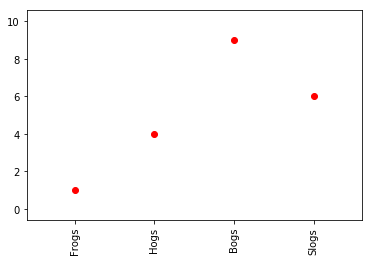

In [1]:
#Rotating custom tick labels

#Demo of custom tick-labels with user-defined rotation.

import matplotlib.pyplot as plt


x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

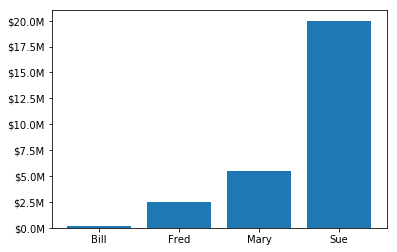

In [2]:
#Custom Ticker1

#The new ticker code was designed to explicitly support user customized ticking. The documentation http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker details this process. That code defines a lot of preset tickers but was primarily designed to be user extensible.

#In this example a user defined function is used to format the ticks in millions of dollars on the y axis

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()

In [3]:
#Automatically setting tick labels

#Setting the behavior of tick auto-placement.

#If you don’t explicitly set tick positions / labels, Matplotlib will attempt to choose them both automatically based on the displayed data and its limits.

#By default, this attempts to choose tick positions that are distributed along the axis:

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(19680801)

fig, ax = plt.subplots()
dots = np.arange(10) / 100. + .03
x, y = np.meshgrid(dots, dots)
data = [x.ravel(), y.ravel()]
ax.scatter(*data, c=data[1])

print(plt.rcParams['axes.autolimit_mode'])



data


In [4]:
# Now change this value and see the results
with plt.rc_context({'axes.autolimit_mode': 'round_numbers'}):
    fig, ax = plt.subplots()
    ax.scatter(*data, c=data[1])

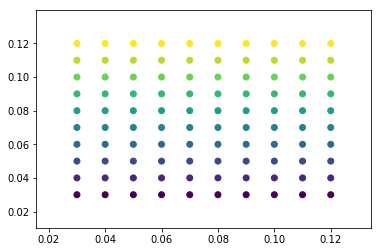

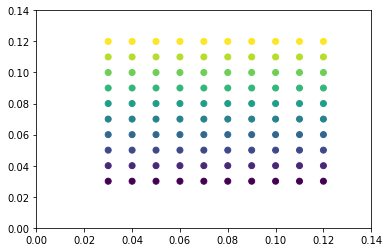

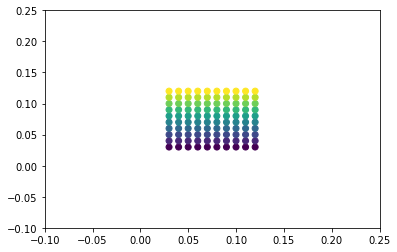

In [5]:
with plt.rc_context({'axes.autolimit_mode': 'round_numbers',
                     'axes.xmargin': .8,
                     'axes.ymargin': .8}):
    fig, ax = plt.subplots()
    ax.scatter(*data, c=data[1])

plt.show()

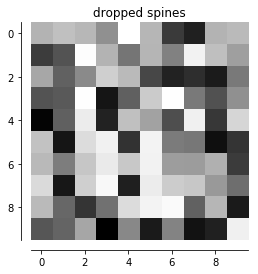

In [6]:
#Dropped spines

#Demo of spines offset from the axes (a.k.a. “dropped spines”).

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

image = np.random.uniform(size=(10, 10))
ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('dropped spines')

# Move left and bottom spines outward by 10 points
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

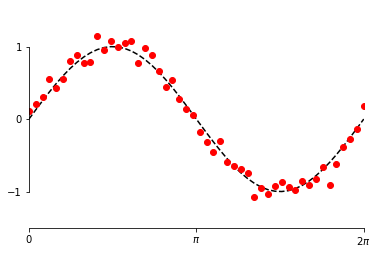

In [7]:
#Custom spine bounds

#Demo of spines using custom bounds to limit the extent of the spine.

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
y2 = y + 0.1 * np.random.normal(size=x.shape)

fig, ax = plt.subplots()
ax.plot(x, y, 'k--')
ax.plot(x, y2, 'ro')

# set ticks and tick labels
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

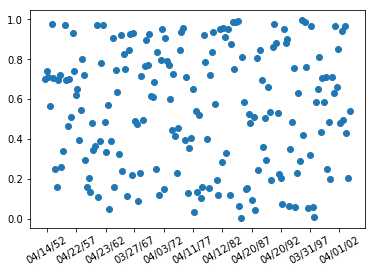

In [8]:
#Date Demo Rrule

#Show how to use an rrule instance to make a custom date ticker - here we put a tick mark on every 5th easter

#See https://dateutil.readthedocs.io/en/stable/ for help with rrules

import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime

# Fixing random state for reproducibility
np.random.seed(19680801)


# tick every 5th easter
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(1952, 1, 1)
date2 = datetime.date(2004, 4, 12)
delta = datetime.timedelta(days=100)

dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))  # make up some random y values


fig, ax = plt.subplots()
plt.plot_date(dates, s)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

plt.show()

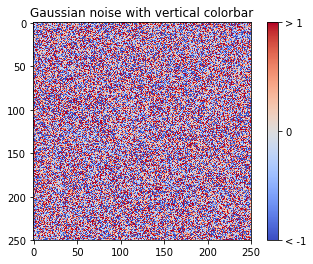

In [9]:
#Colorbar Tick Labelling Demo

#Produce custom labelling for a colorbar.

#Contributed by Scott Sinclair

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import randn

#Make plot with vertical (default) colorbar

fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

plt.show()

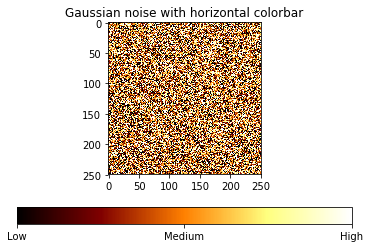

In [10]:
#Make plot with horizontal colorbar

fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.afmhot)
ax.set_title('Gaussian noise with horizontal colorbar')

cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

plt.show()

loading /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/msft.csv


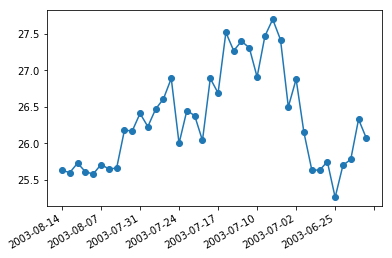

In [11]:
#Date Index Formatter

#When plotting daily data, a frequent request is to plot the data ignoring skips, e.g., no extra spaces for weekends. This is particularly common in financial time series, when you may have data for M-F and not Sat, Sun and you don’t want gaps in the x axis. The approach is to simply use the integer index for the xdata and a custom tick Formatter to get the appropriate date string for a given index.

#Out:loading /home/tcaswell/.virtualenvs/bleeding/lib/python3.7/site-packages/matplotlib/mpl-data/sample_data/msft.csv

from __future__ import print_function
import numpy as np
from matplotlib.mlab import csv2rec
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import Formatter

datafile = cbook.get_sample_data('msft.csv', asfileobj=False)
print('loading %s' % datafile)
r = csv2rec(datafile)[-40:]


class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return self.dates[ind].strftime(self.fmt)

formatter = MyFormatter(r.date)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.plot(np.arange(len(r)), r.close, 'o-')
fig.autofmt_xdate()
plt.show()


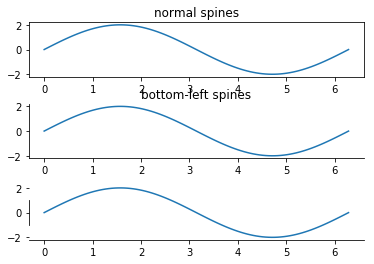

In [12]:
#Spines

#This demo compares:
#normal axes, with spines on all four sides;
#an axes with spines only on the left and bottom;
#an axes using custom bounds to limit the extent of the spine.

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi, 100)
y = 2 * np.sin(x)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)

ax0.plot(x, y)
ax0.set_title('normal spines')

ax1.plot(x, y)
ax1.set_title('bottom-left spines')

# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

ax2.plot(x, y)

# Only draw spine between the y-ticks
ax2.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)
plt.show()

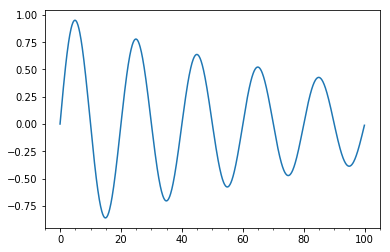

In [13]:
#Major Minor Demo

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

majorLocator = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(5)


t = np.arange(0.0, 100.0, 0.1)
s = np.sin(0.1 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)

plt.show()

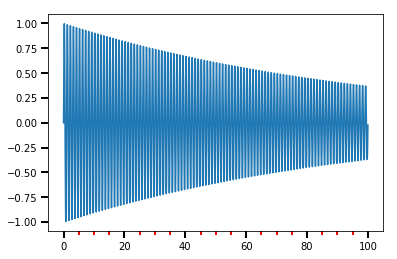

In [14]:
minorLocator = AutoMinorLocator()


t = np.arange(0.0, 100.0, 0.01)
s = np.sin(2 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.xaxis.set_minor_locator(minorLocator)

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

plt.show()

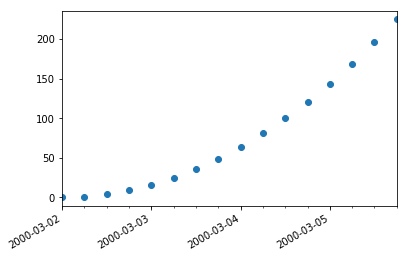

In [15]:
#Date Demo Convert

import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import numpy as np

date1 = datetime.datetime(2000, 3, 2)
date2 = datetime.datetime(2000, 3, 6)
delta = datetime.timedelta(hours=6)
dates = drange(date1, date2, delta)

y = np.arange(len(dates))

fig, ax = plt.subplots()
ax.plot_date(dates, y ** 2)

# this is superfluous, since the autoscaler should get it right, but
# use date2num and num2date to convert between dates and floats if
# you want; both date2num and num2date convert an instance or sequence
ax.set_xlim(dates[0], dates[-1])

# The hour locator takes the hour or sequence of hours you want to
# tick, not the base multiple

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(range(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()

plt.show()

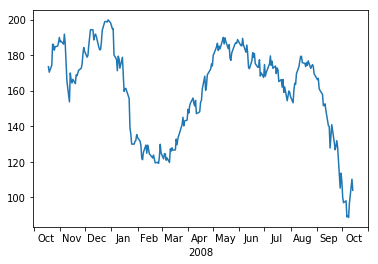

In [16]:
#Centered Ticklabels

import numpy as np
import matplotlib.cbook as cbook
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# load some financial data; apple's stock price
with cbook.get_sample_data('aapl.npz') as fh:
    r = np.load(fh)['price_data'].view(np.recarray)
r = r[-250:]  # get the last 250 days
# Matplotlib works better with datetime.datetime than np.datetime64, but the
# latter is more portable.
date = r.date.astype('O')

fig, ax = plt.subplots()
ax.plot(date, r.adj_close)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(r) // 2
ax.set_xlabel(str(date[imid].year))
plt.show()


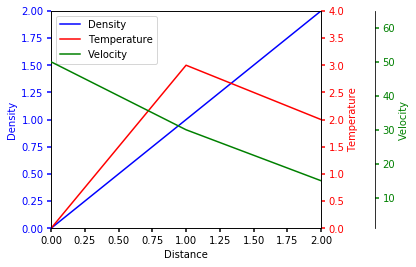

In [17]:
#Multiple Yaxis With Spines

import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()


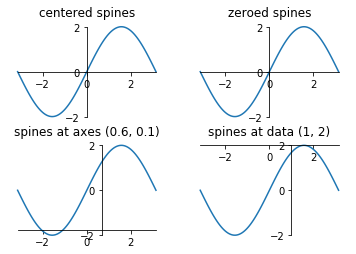

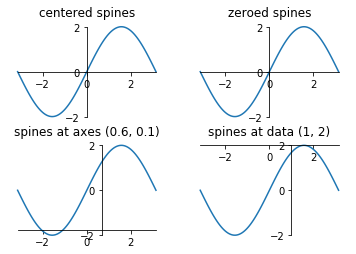

In [19]:
#Spine Placement Demo

#Adjusting the location and appearance of axis spines.

import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = 2 * np.sin(x)

ax = fig.add_subplot(2, 2, 1)
ax.set_title('centered spines')
ax.plot(x, y)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 2)
ax.set_title('zeroed spines')
ax.plot(x, y)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 3)
ax.set_title('spines at axes (0.6, 0.1)')
ax.plot(x, y)
ax.spines['left'].set_position(('axes', 0.6))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('axes', 0.1))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = fig.add_subplot(2, 2, 4)
ax.set_title('spines at data (1, 2)')
ax.plot(x, y)
ax.spines['left'].set_position(('data', 1))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 2))
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.show()

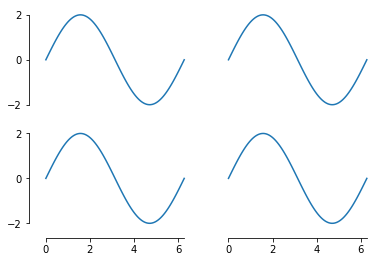

In [20]:
#Define a method that adjusts the location of the axis spines

def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])
#Create another figure using our new adjust_spines method

fig = plt.figure()

x = np.linspace(0, 2 * np.pi, 100)
y = 2 * np.sin(x)

ax = fig.add_subplot(2, 2, 1)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['left'])

ax = fig.add_subplot(2, 2, 2)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, [])

ax = fig.add_subplot(2, 2, 3)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['left', 'bottom'])

ax = fig.add_subplot(2, 2, 4)
ax.plot(x, y, clip_on=False)
adjust_spines(ax, ['bottom'])

plt.show()

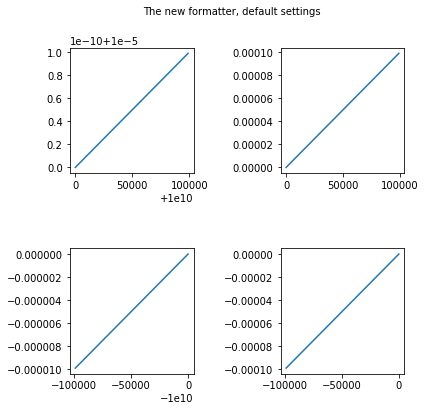

In [22]:
#Tick formatting using the ScalarFromatter

#The example shows use of ScalarFormatter with different settings.


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

#Example 1

x = np.arange(0, 1, .01)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 6))
fig.text(0.5, 0.975, 'The new formatter, default settings',
         horizontalalignment='center',
         verticalalignment='top')

ax1.plot(x * 1e5 + 1e10, x * 1e-10 + 1e-5)
ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.yaxis.set_major_formatter(ScalarFormatter())

ax2.plot(x * 1e5, x * 1e-4)
ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.yaxis.set_major_formatter(ScalarFormatter())

ax3.plot(-x * 1e5 - 1e10, -x * 1e-5 - 1e-10)
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.yaxis.set_major_formatter(ScalarFormatter())

ax4.plot(-x * 1e5, -x * 1e-4)
ax4.xaxis.set_major_formatter(ScalarFormatter())
ax4.yaxis.set_major_formatter(ScalarFormatter())

fig.subplots_adjust(wspace=0.7, hspace=0.6)

plt.show()

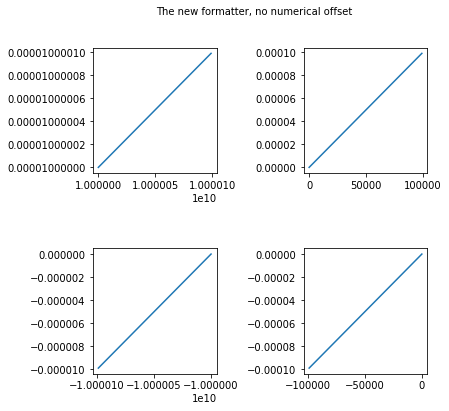

In [23]:
#Example 2

x = np.arange(0, 1, .01)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 6))
fig.text(0.5, 0.975, 'The new formatter, no numerical offset',
         horizontalalignment='center',
         verticalalignment='top')

ax1.plot(x * 1e5 + 1e10, x * 1e-10 + 1e-5)
ax1.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

ax2.plot(x * 1e5, x * 1e-4)
ax2.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

ax3.plot(-x * 1e5 - 1e10, -x * 1e-5 - 1e-10)
ax3.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax3.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

ax4.plot(-x * 1e5, -x * 1e-4)
ax4.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax4.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

fig.subplots_adjust(wspace=0.7, hspace=0.6)

plt.show()

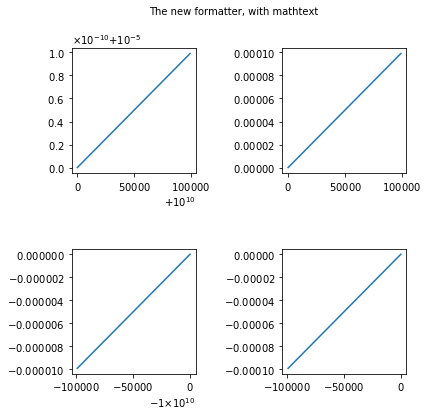

In [24]:
#Example 3

x = np.arange(0, 1, .01)
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 6))
fig.text(0.5, 0.975, 'The new formatter, with mathtext',
         horizontalalignment='center',
         verticalalignment='top')

ax1.plot(x * 1e5 + 1e10, x * 1e-10 + 1e-5)
ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

ax2.plot(x * 1e5, x * 1e-4)
ax2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

ax3.plot(-x * 1e5 - 1e10, -x * 1e-5 - 1e-10)
ax3.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax3.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

ax4.plot(-x * 1e5, -x * 1e-4)
ax4.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax4.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

fig.subplots_adjust(wspace=0.7, hspace=0.6)

plt.show()

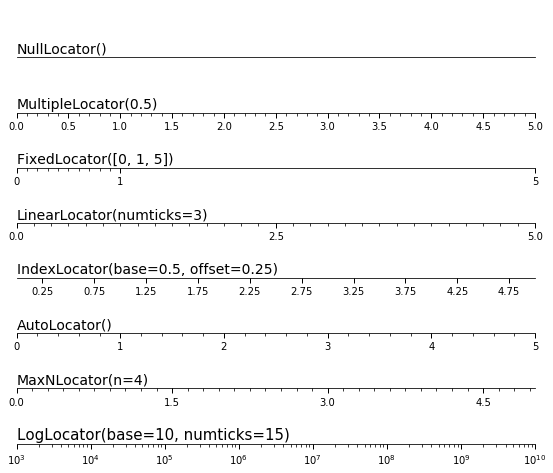

In [25]:
#Tick locators

#Show the different tick locators.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='White')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

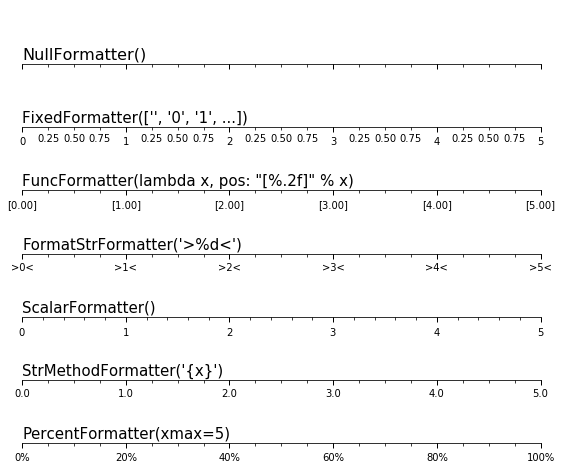

In [26]:
#Tick formatters

#Show the different tick formatters.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


fig = plt.figure(figsize=(8, 6))
n = 7

# Null formatter
ax = fig.add_subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.text(0.0, 0.1, "NullFormatter()", fontsize=16, transform=ax.transAxes)

# Fixed formatter
ax = fig.add_subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
majors = ["", "0", "1", "2", "3", "4", "5"]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
minors = [""] + ["%.2f" % (x-int(x)) if (x-int(x))
                 else "" for x in np.arange(0, 5, 0.25)]
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))
ax.text(0.0, 0.1, "FixedFormatter(['', '0', '1', ...])",
        fontsize=15, transform=ax.transAxes)


# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "[%.2f]" % x


ax = fig.add_subplot(n, 1, 3)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(major_formatter)
ax.text(0.0, 0.1, 'FuncFormatter(lambda x, pos: "[%.2f]" % x)',
        fontsize=15, transform=ax.transAxes)


# FormatStr formatter
ax = fig.add_subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))
ax.text(0.0, 0.1, "FormatStrFormatter('>%d<')",
        fontsize=15, transform=ax.transAxes)

# Scalar formatter
ax = fig.add_subplot(n, 1, 5)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.text(0.0, 0.1, "ScalarFormatter()", fontsize=15, transform=ax.transAxes)

# StrMethod formatter
ax = fig.add_subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.1, "StrMethodFormatter('{x}')",
        fontsize=15, transform=ax.transAxes)

# Percent formatter
ax = fig.add_subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
ax.text(0.0, 0.1, "PercentFormatter(xmax=5)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()